--- In this example you can see how to make a (RBG) colour image by combining images in 3 filters. Incidentally the 3 filters chosen for this example will result in an image that mimics a true colour image. These are the colours you would approximately see!

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
image_dir = 'data' # define image directory relative to this script

In [3]:
f_RGB = {'R': 'f775w', 'G': 'f606w', 'B': 'f435w'} # define the images corresponding to the RGB channels

In [4]:
im = {channel: fits.getdata(f'{image_dir}/{f}_sci.fits') for channel,f in f_RGB.items()} # read all 3 images into a dictionary

In [5]:
mask = fits.getdata(f'{image_dir}/mask.fits') # read in the image mask

--- for each image

In [6]:
for channel in 'RGB':
    im[channel] = np.ma.masked_array(im[channel], mask = mask) # apply the mask to our image

    # --- clip negative and erroneously high values and rescale values to be 0 - 1
    # --- NOTE: you can play around here to change the colour balance and contrast of your images
    vmin = 0 # exclude negative values (anything less than vmin gets mapped to vmin)
    vmax =  np.percentile(im[channel][~np.isnan(im[channel])], 99) # exclude the brightest 1% of pixels (anything above gets mapped to that value)
    norm = cm.colors.Normalize(vmin, vmax) # normalisation function
    im[channel] = norm(im[channel]) # apply normalisation function

    # --- set masked values to zero (this makes those pixels black)
    im[channel] = np.ma.filled(im[channel], 0.0) # return masked array with masked values set to 0.0

In [7]:
rgb = np.dstack((im['R'],im['G'],im['B'])) # stack images into a single array

--- make a plot of the full (masked) image and save it

(0.0, 1.0, 0.0, 1.0)

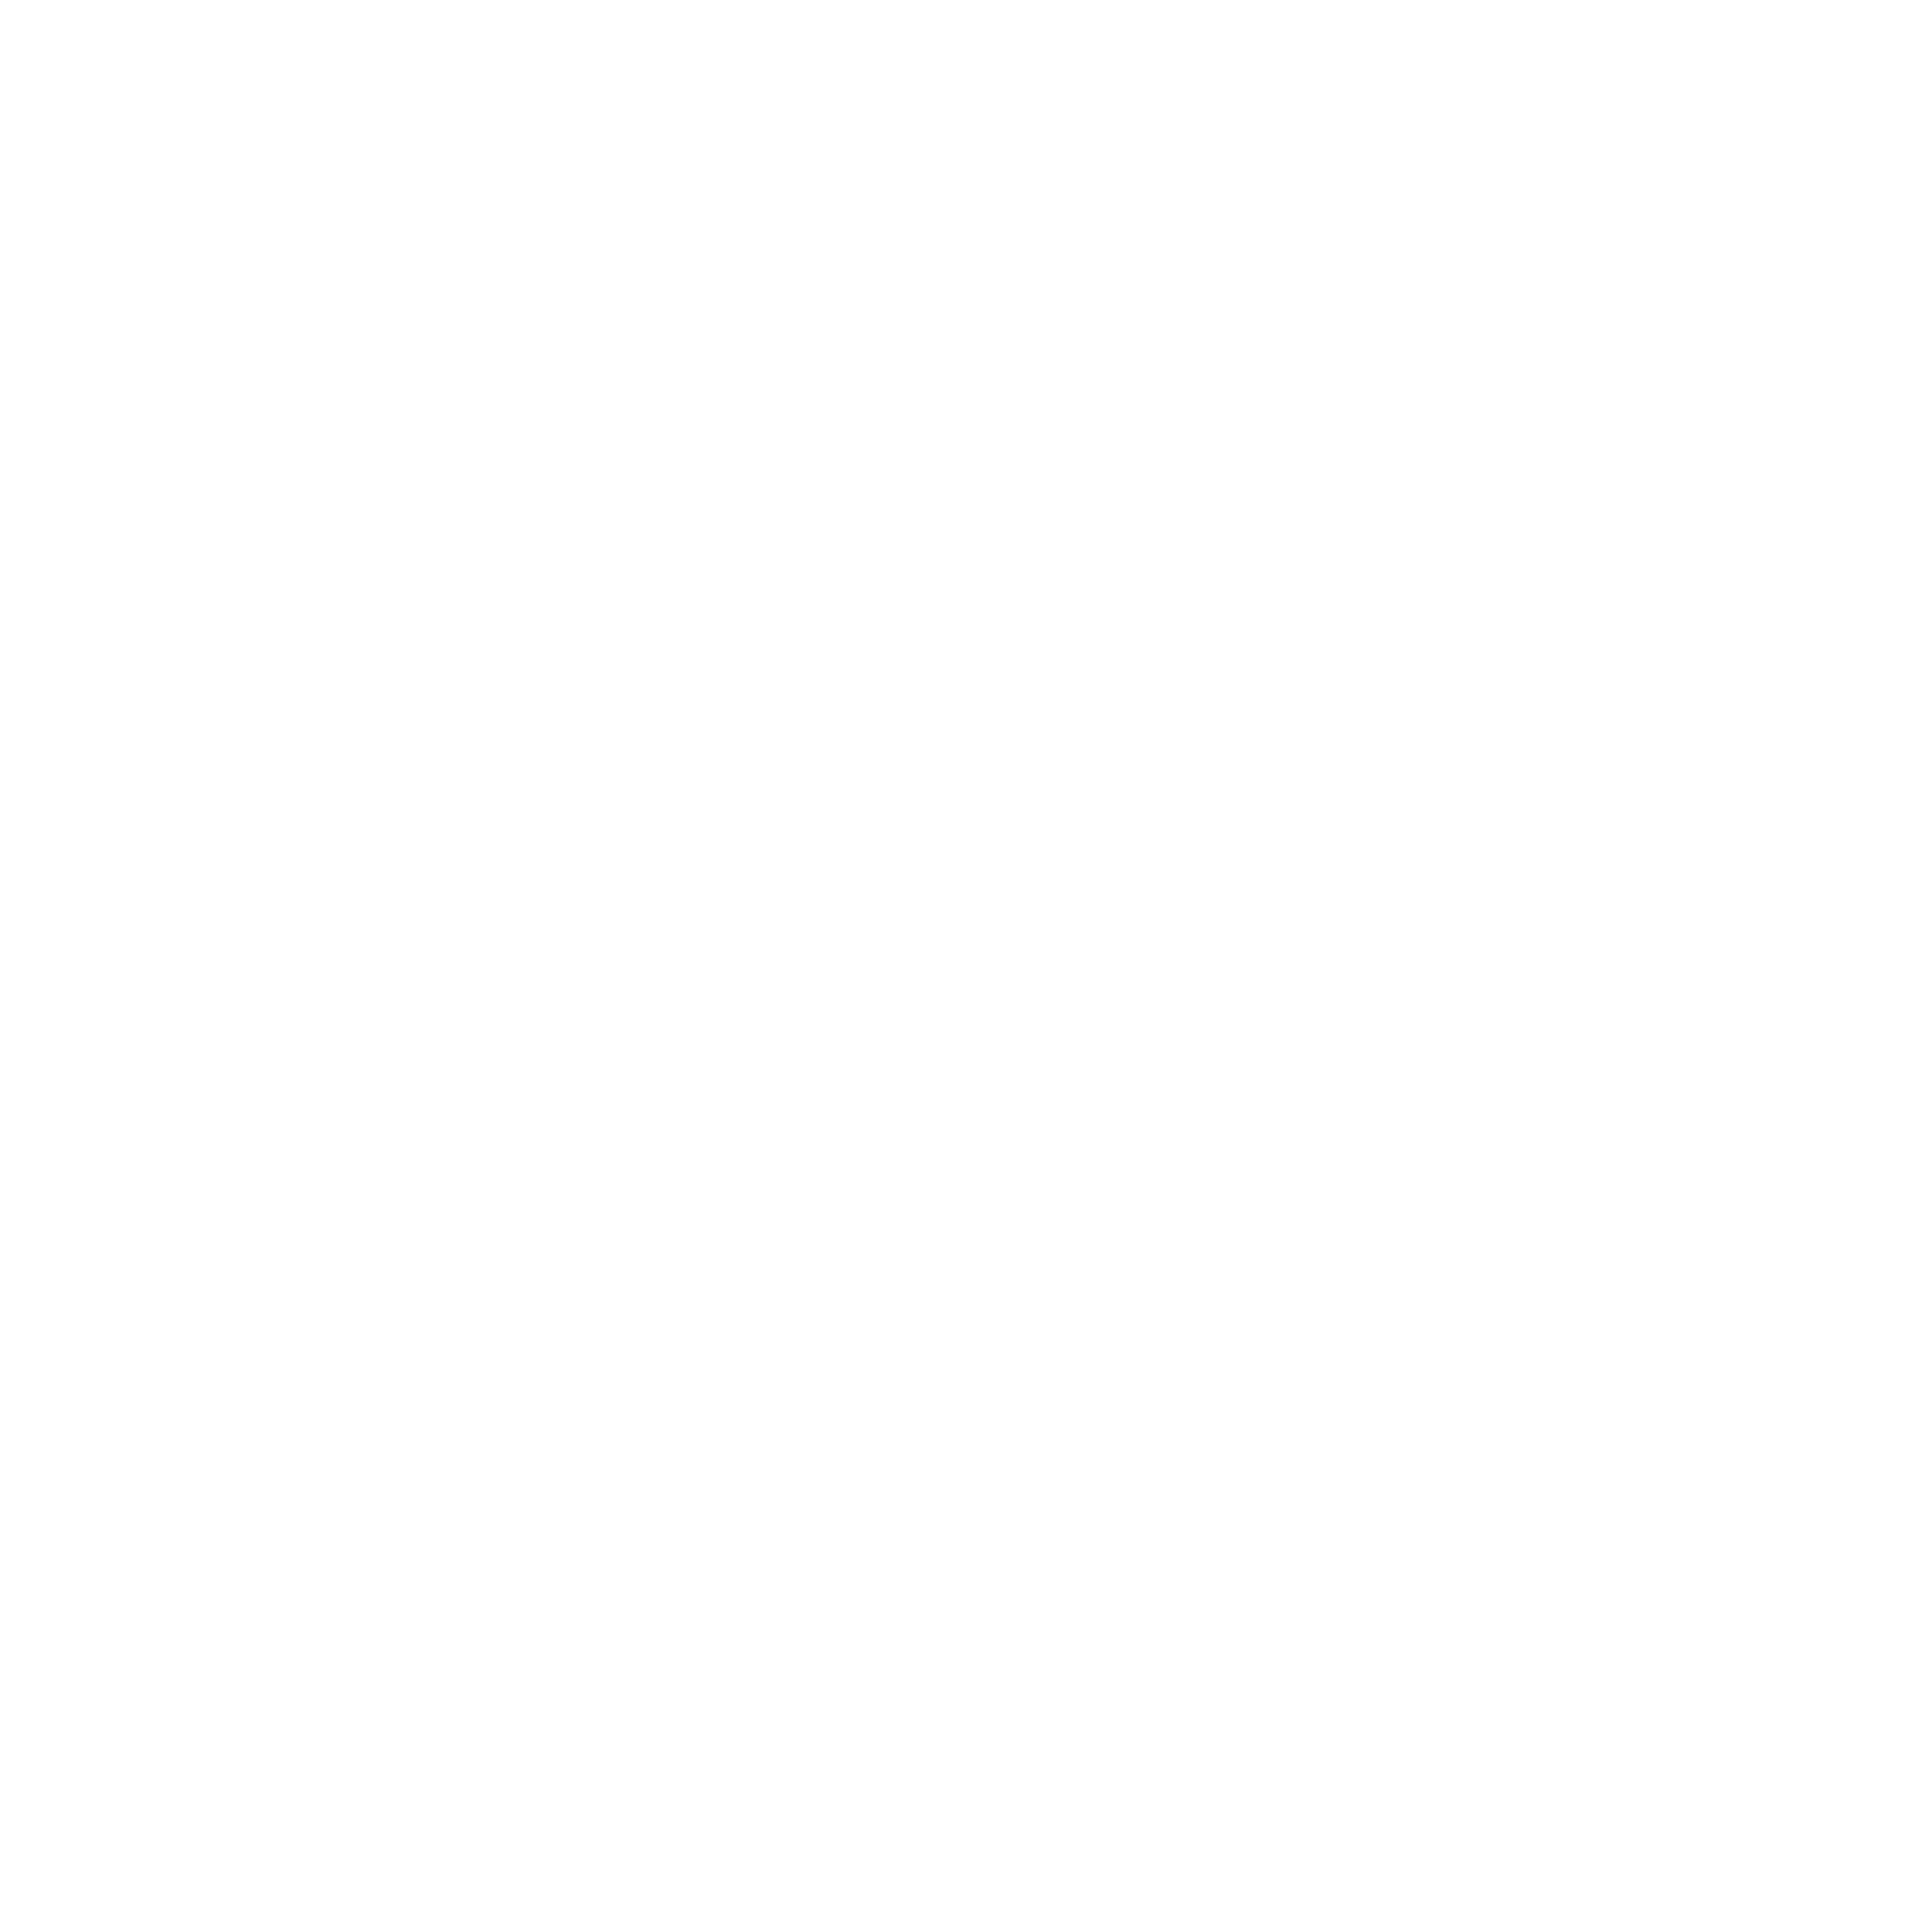

In [8]:
dpi = rgb.shape[0] # set dots per inch equal to the number of pixels.
fig = plt.figure(figsize = (1, 1), dpi = dpi)
ax = fig.add_axes((0.0, 0.0, 1.0, 1.0)) # define axes to cover entire field
ax.axis('off') # turn off axes frame, ticks, and labels

In [9]:
ax.imshow(rgb) # shouldn't see much because the scale is dominated by outlier pixels
fig.savefig('XDF_rgb.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


--- make a plot of the central 300 pixels of the image

In [10]:
x = rgb.shape[0] // 2 # pixel x-centre of cutout, must be an integer
y = rgb.shape[1] // 2  # pixel y-centre of cutout, must be an integer
r = 150 # width/2 of cutout, must be int

In [11]:
slices = [slice(x-r,x+r,None),slice(y-r,y+r,None)]

In [12]:
centre = rgb[slices]

<ipython-input-12-b387f5432c31>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  centre = rgb[slices]


(0.0, 1.0, 0.0, 1.0)

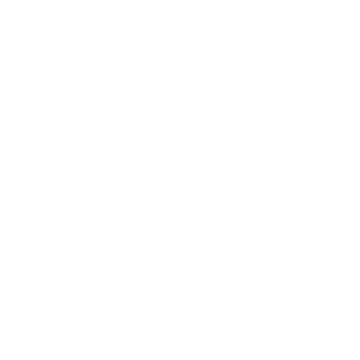

In [13]:
dpi = centre.shape[0] # set dots per inch equal to the number of pixels.
fig = plt.figure(figsize = (1, 1), dpi = dpi)
ax = fig.add_axes((0.0, 0.0, 1.0, 1.0)) # define axes to cover entire field
ax.axis('off') # turn off axes frame, ticks, and labels

In [14]:
ax.imshow(centre) # shouldn't see much because the scale is dominated by outlier pixels
fig.savefig('XDF_centre_rgb.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
